In [2]:
import numpy as numpy
import pandas as pd

In [3]:
chunked_data = pd.read_csv('data/train_ver2.csv',chunksize=100000)
df_sample_train = next(chunked_data)

In [4]:
df_sample_train.head()

,fecha_dato,ncodpers,ind_empleado,pais_residencia,sexo,age,fecha_alta,ind_nuevo,antiguedad,indrel,...,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1
0,2015-01-28,1375586,N,ES,H,35,2015-01-12,0.0,6,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
1,2015-01-28,1050611,N,ES,V,23,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
2,2015-01-28,1050612,N,ES,V,23,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
3,2015-01-28,1050613,N,ES,H,22,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
4,2015-01-28,1050614,N,ES,V,23,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0


### Data Overview

In [5]:
df_sample_train.shape

(100000, 48)

In [6]:
df_sample_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 48 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   fecha_dato             100000 non-null  object 
 1   ncodpers               100000 non-null  int64  
 2   ind_empleado           99317 non-null   object 
 3   pais_residencia        99317 non-null   object 
 4   sexo                   99317 non-null   object 
 5   age                    100000 non-null  object 
 6   fecha_alta             99317 non-null   object 
 7   ind_nuevo              99317 non-null   float64
 8   antiguedad             100000 non-null  object 
 9   indrel                 99317 non-null   float64
 10  ult_fec_cli_1t         128 non-null     object 
 11  indrel_1mes            99317 non-null   float64
 12  tiprel_1mes            99317 non-null   object 
 13  indresi                99317 non-null   object 
 14  indext                 99317 non-null

In [7]:
missing_value_percentage = df_sample_train.isnull().sum()/len(df_sample_train) * 100
missing_value_percentage

fecha_dato                 0.000
ncodpers                   0.000
ind_empleado               0.683
pais_residencia            0.683
sexo                       0.683
age                        0.000
fecha_alta                 0.683
ind_nuevo                  0.683
antiguedad                 0.000
indrel                     0.683
ult_fec_cli_1t            99.872
indrel_1mes                0.683
tiprel_1mes                0.683
indresi                    0.683
indext                     0.683
conyuemp                 100.000
canal_entrada              0.688
indfall                    0.683
tipodom                    0.683
cod_prov                   0.769
nomprov                    0.769
ind_actividad_cliente      0.683
renta                     18.284
segmento                   0.691
ind_ahor_fin_ult1          0.000
ind_aval_fin_ult1          0.000
ind_cco_fin_ult1           0.000
ind_cder_fin_ult1          0.000
ind_cno_fin_ult1           0.000
ind_ctju_fin_ult1          0.000
ind_ctma_f

In [8]:
df_sample_train['ncodpers'].nunique()

100000

### Customer Demographics & Behavior Analysis

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

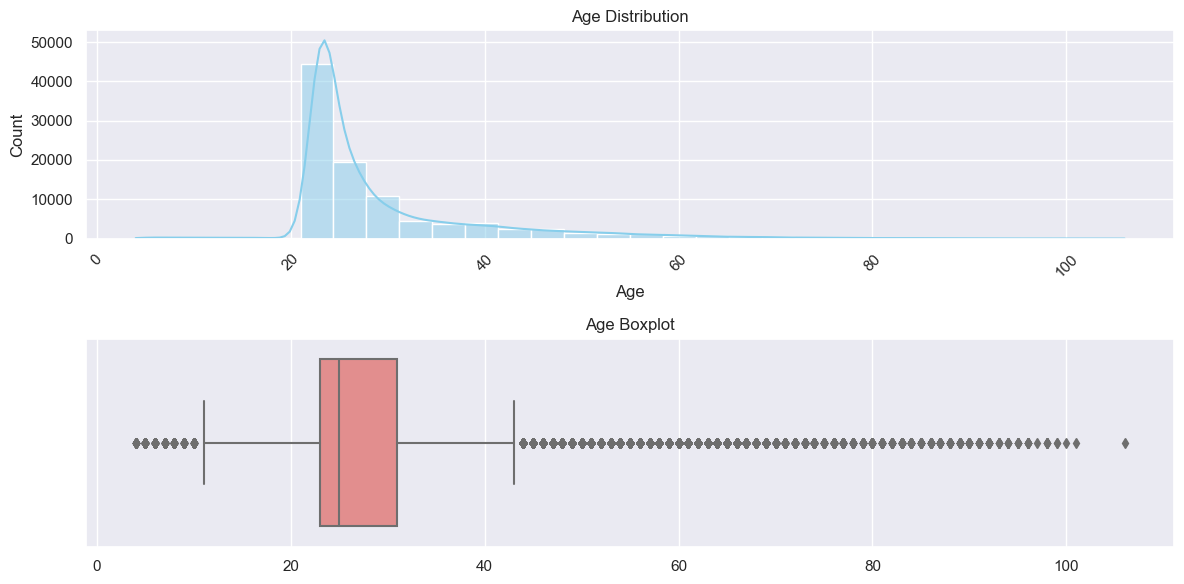

In [10]:
age_data = pd.to_numeric(df_sample_train['age'], errors='coerce').dropna()


fig, axes = plt.subplots(2, 1, figsize=(12, 6))

sns.histplot(age_data, bins=30, kde=True, ax=axes[0], color='skyblue')
axes[0].set_title('Age Distribution')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Count')
axes[0].tick_params(axis='x', rotation=45)

sns.boxplot(x=age_data, ax=axes[1], color='lightcoral')
axes[1].set(xlabel=None)
axes[1].set_title('Age Boxplot')

plt.tight_layout()
plt.show()


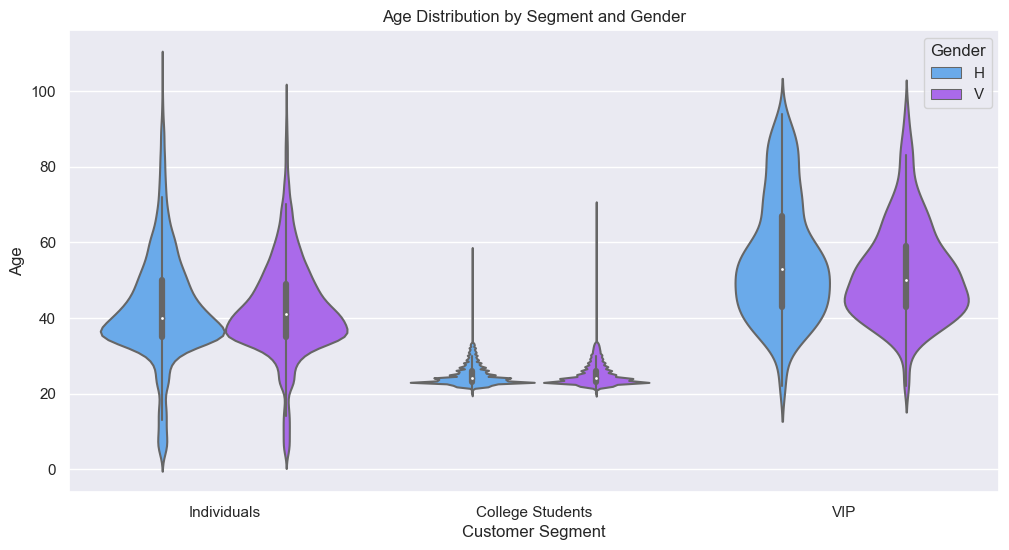

In [13]:
segment_labels = {
    '01 - TOP': 'VIP',
    '02 - PARTICULARES': 'Individuals',
    '03 - UNIVERSITARIO': 'College Students'
}

df_sample_train['age'] = pd.to_numeric(df_sample_train['age'], errors='coerce')
df_viz = df_sample_train.dropna(subset=['age', 'segmento', 'sexo']).copy()

df_viz.loc[:, 'segmento'] = df_viz['segmento'].replace(segment_labels)

plt.figure(figsize=(12,6))
sns.violinplot(x='segmento', y='age', hue='sexo', data=df_viz, inner='box', palette='cool')
plt.title('Age Distribution by Segment and Gender')
plt.xlabel('Customer Segment')
plt.ylabel('Age')
plt.legend(title='Gender')
plt.show()

### Income distribution

In [29]:
df_sample_train['renta'].max()

24253236.93

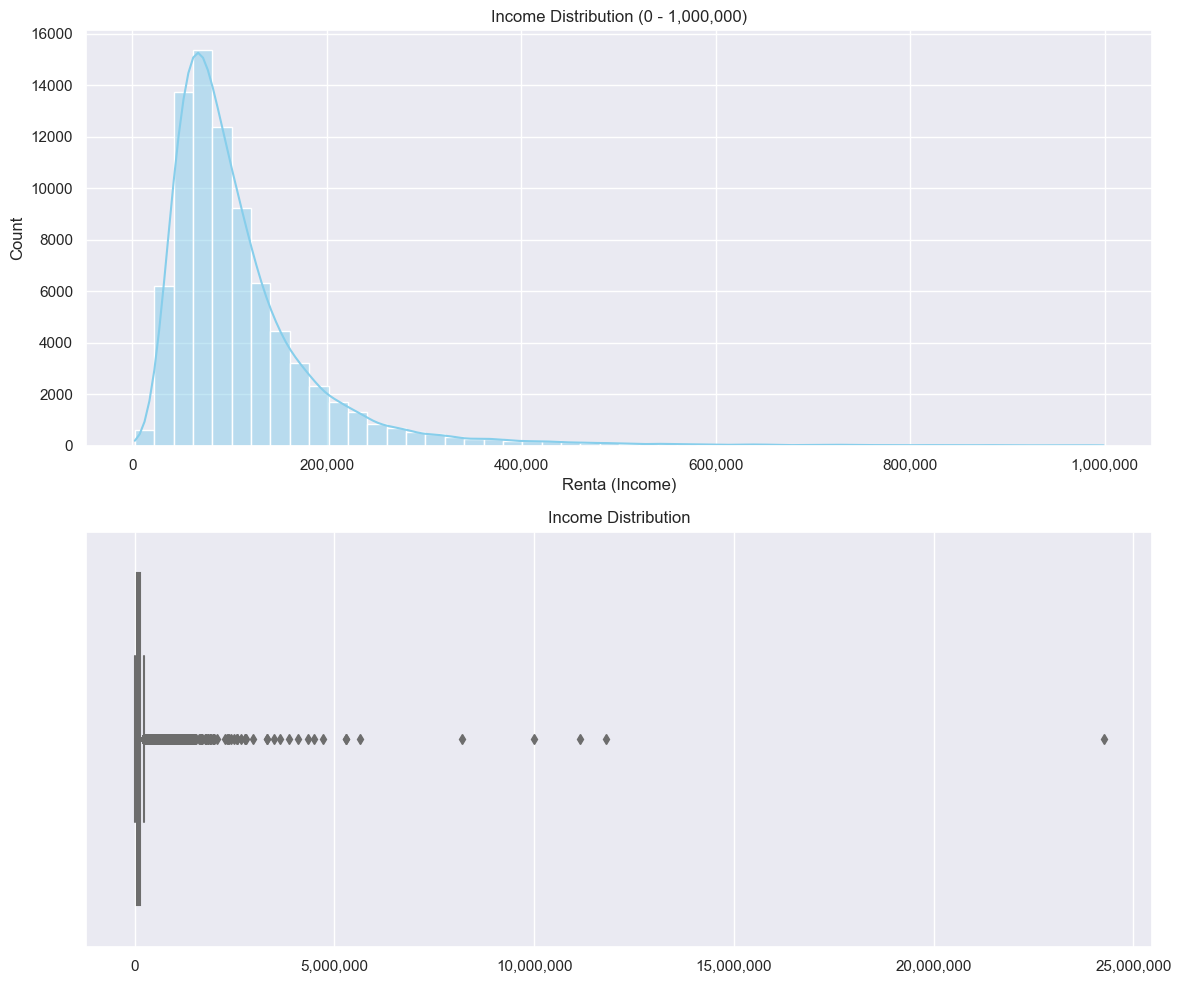

In [35]:
import matplotlib.ticker as ticker

df_sample_train['renta'] = pd.to_numeric(df_sample_train['renta'], errors='coerce')
df_renta = df_sample_train['renta'].dropna()
df_renta_clean = df_renta[(df_renta > 0) & (df_renta < 1_000_000)]
# Plot income distribution again
fig, ax = plt.subplots(2,1, figsize=(12,10))
sns.histplot(df_renta_clean, bins=50, kde=True, color='skyblue',ax = ax[0])
ax[0].set_title('Income Distribution (0 - 1,000,000)')
ax[0].set_xlabel('Renta (Income)')
ax[0].set_ylabel('Count')
ax[0].xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'))

sns.boxplot(x=df_renta, ax = ax[1],color = 'salmon')
ax[1].set_title('Income Distribution')
ax[1].set(xlabel = None)
ax[1].xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'))

plt.tight_layout()
plt.show()


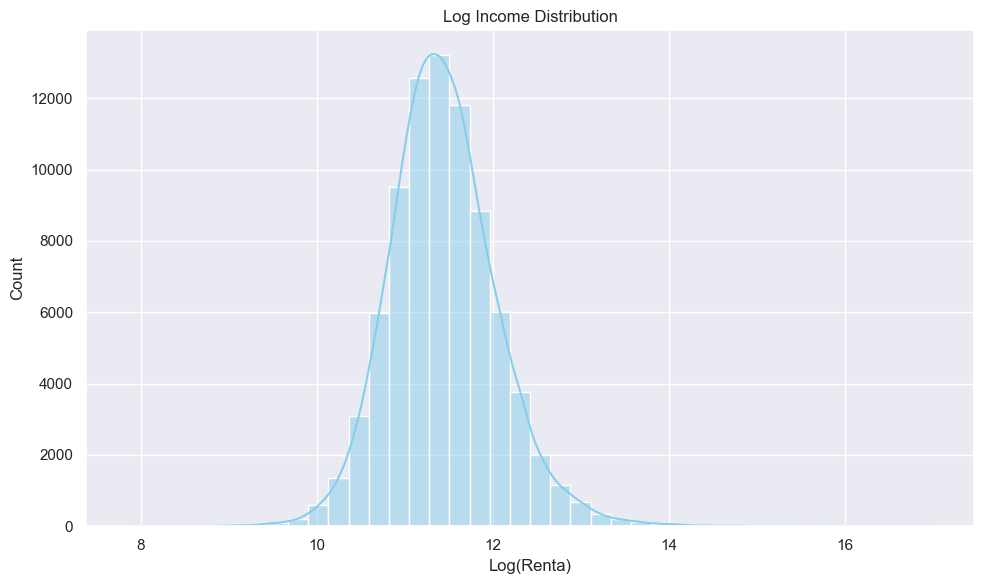

In [39]:
import numpy as np
df_renta_log = np.log1p(df_renta[df_renta > 0])

plt.figure(figsize=(10,6))
sns.histplot(df_renta_log, bins=40, kde=True, color='skyblue')
plt.title('Log Income Distribution')
plt.xlabel('Log(Renta)')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


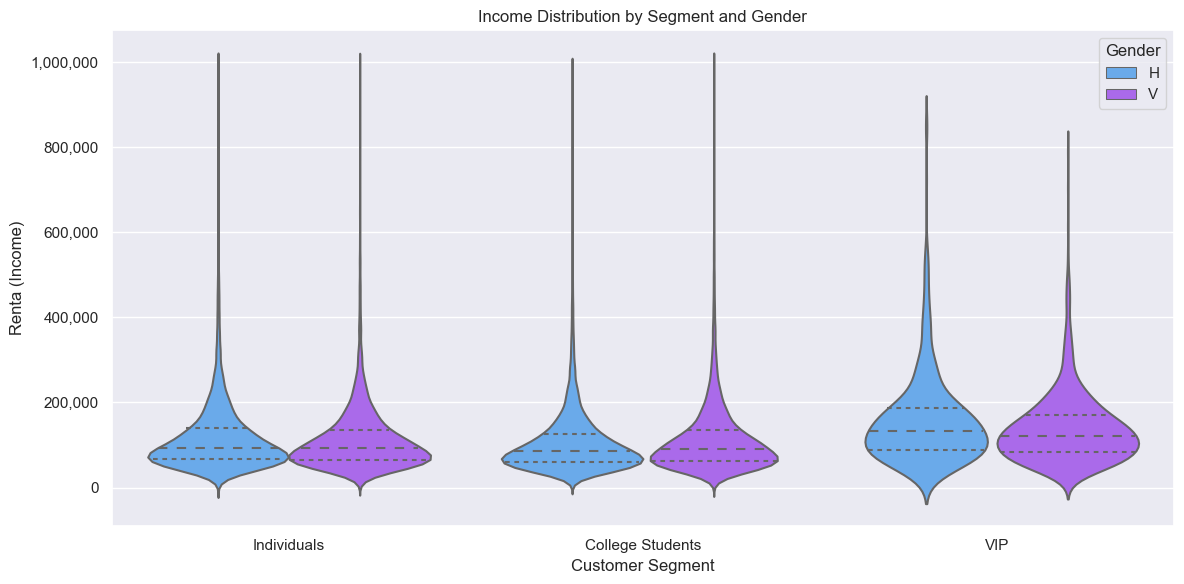

In [47]:
# Income distribution aling different segments and Active/Inactive status and Sex

# Clean renta and filter out invalid/huge values
df_income_viz = df_sample_train.dropna(subset=['renta', 'segmento', 'sexo']).copy()
df_income_viz = df_income_viz[df_income_viz['renta'] <= 1_000_000]  # cap extreme outliers

# Plot
df_income_viz.loc[:, 'segmento'] = df_income_viz['segmento'].replace(segment_labels)

plt.figure(figsize=(12,6))
sns.violinplot(x='segmento', y='renta', hue='sexo', data=df_income_viz, inner='quartile', palette='cool')
plt.title('Income Distribution by Segment and Gender')
plt.xlabel('Customer Segment')
plt.ylabel('Renta (Income)')
plt.legend(title='Gender')

ax = plt.gca()
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, _: f'{int(y):,}'))
plt.tight_layout()
plt.show()


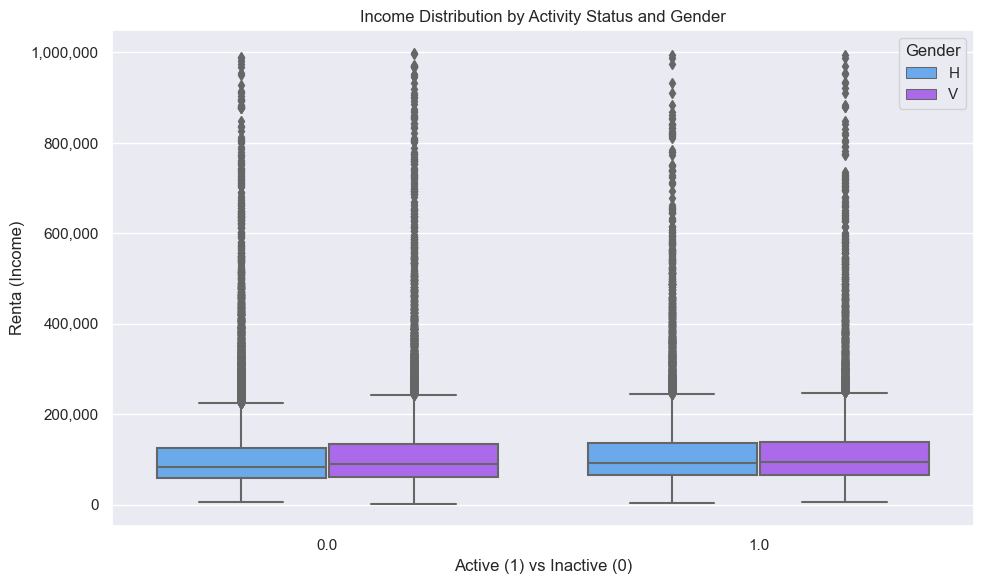

In [50]:
plt.figure(figsize=(10,6))
sns.boxplot(x='ind_actividad_cliente', y='renta', hue='sexo', data=df_income_viz, palette='cool')
plt.title('Income Distribution by Activity Status and Gender')
plt.xlabel('Active (1) vs Inactive (0)')
plt.ylabel('Renta (Income)')
plt.legend(title='Gender')

ax = plt.gca()
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, _: f'{int(y):,}'))
plt.tight_layout()
plt.show()


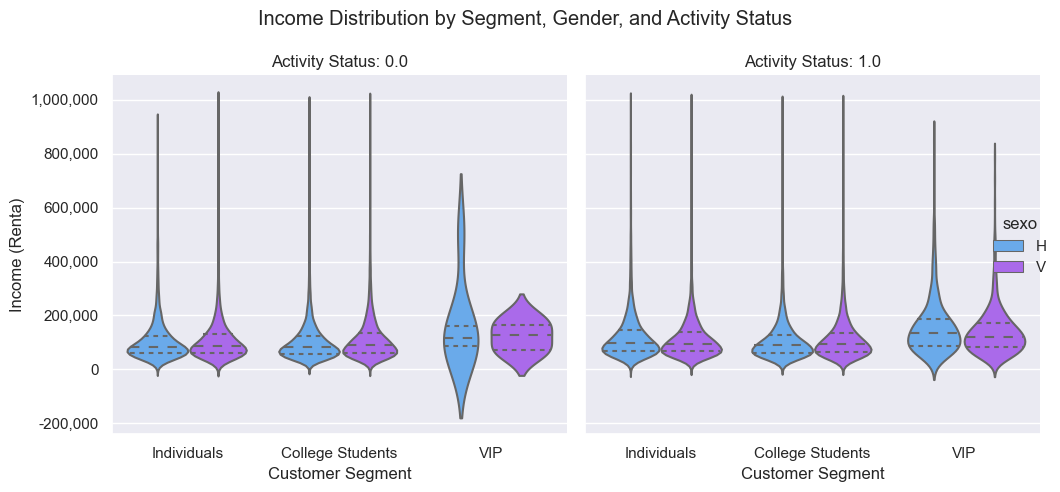

In [68]:
g = sns.catplot(
    data=df_income_viz,
    x='segmento', y='renta', hue='sexo',
    col='ind_actividad_cliente',
    kind='violin',
    palette='cool', inner='quartile'
)

g.set_titles("Activity Status: {col_name}")
g.set_axis_labels("Customer Segment", "Income (Renta)")
g.fig.subplots_adjust(top=0.85)
g.fig.suptitle("Income Distribution by Segment, Gender, and Activity Status")
ax = plt.gca()
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, _: f'{int(y):,}'))
plt.tight_layout()
plt.show()


### Customer Tenure

**Customer tenure (antiguedad)**

- Distribution of seniority

- Tenure vs. number of products owned (or key products like credit card, mortgage)

**Customer activity status (ind_actividad_cliente)**
- Barplot of active vs inactive customers

- Segment-wise or age-wise activity level comparison

**Customer segmentation (segmento)**

- Countplot of segment distribution

- Segment-wise product ownership patterns

